In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 6*[0,1] -> [0,6] - 3  -> [-3,3]
X = 6 * np.random.rand(100, 1) - 3  # 100 rows ,1 Col each value [-3,3] because of -3
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100, 1)
# np.random.randn(100,1) Adds Real World like data making data imperfect

Text(0, 0.5, 'Y DataSet')

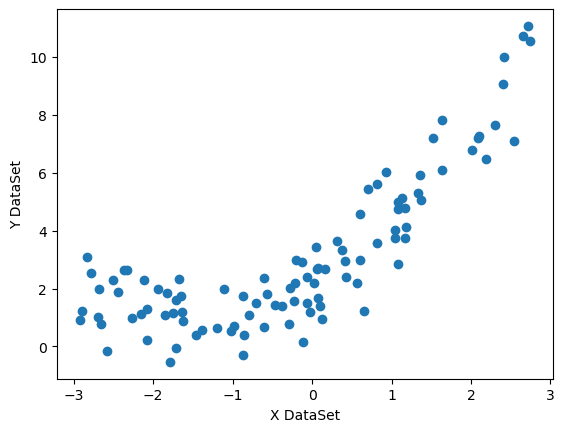

In [8]:
plt.scatter(X, y)
plt.xlabel("X DataSet")
plt.ylabel("Y DataSet")

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression(n_jobs=-1)
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [12]:
y_pred = regression.predict(X_test)

In [13]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print(score)

0.6766478126506829


Text(0, 0.5, 'Y')

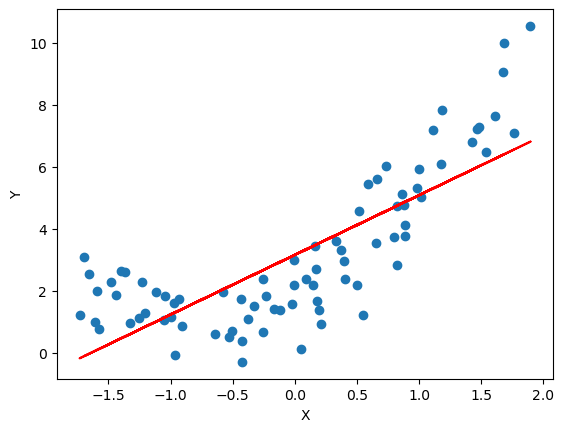

In [15]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), c="r")
plt.xlabel("X")
plt.ylabel("Y")

# Polynomial Regression Here

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(
    degree=2, include_bias=True
)  # include_bias=True Adds a Constant Col
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [18]:
# Bias + x1 + x2^2
X_train_poly

array([[ 1.00000000e+00,  9.06654244e-02,  8.22021918e-03],
       [ 1.00000000e+00,  1.53613320e+00,  2.35970521e+00],
       [ 1.00000000e+00,  1.76328355e-01,  3.10916887e-02],
       [ 1.00000000e+00, -9.94164605e-01,  9.88363262e-01],
       [ 1.00000000e+00,  5.84980365e-01,  3.42202027e-01],
       [ 1.00000000e+00, -1.36944831e+00,  1.87538866e+00],
       [ 1.00000000e+00,  1.01129645e+00,  1.02272051e+00],
       [ 1.00000000e+00, -4.26858916e-01,  1.82208534e-01],
       [ 1.00000000e+00, -5.29683628e-01,  2.80564746e-01],
       [ 1.00000000e+00, -2.57099055e-01,  6.60999241e-02],
       [ 1.00000000e+00, -1.15893172e-01,  1.34312273e-02],
       [ 1.00000000e+00,  4.03048302e-01,  1.62447933e-01],
       [ 1.00000000e+00,  8.85812929e-01,  7.84664545e-01],
       [ 1.00000000e+00, -1.39552773e+00,  1.94749764e+00],
       [ 1.00000000e+00,  1.45057390e-01,  2.10416463e-02],
       [ 1.00000000e+00,  1.62687078e-01,  2.64670853e-02],
       [ 1.00000000e+00,  6.58148737e-01

In [20]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression(n_jobs=-1)
regression.fit(X_train_poly, y_train)

y_pred = regression.predict(X_test_poly)

In [21]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print(score)	# Higher Accuracy Than Simple Linear Regression

0.9022051705349086


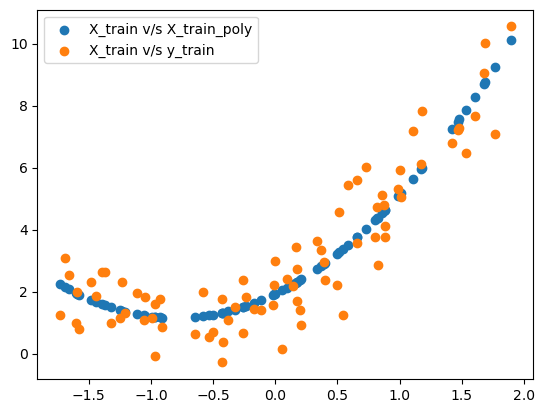

In [32]:
plt.scatter(X_train, regression.predict(X_train_poly), label="X_train v/s X_train_poly")
plt.scatter(X_train, y_train, label="X_train v/s y_train")
plt.legend()

In [25]:
# Prediction of New Data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

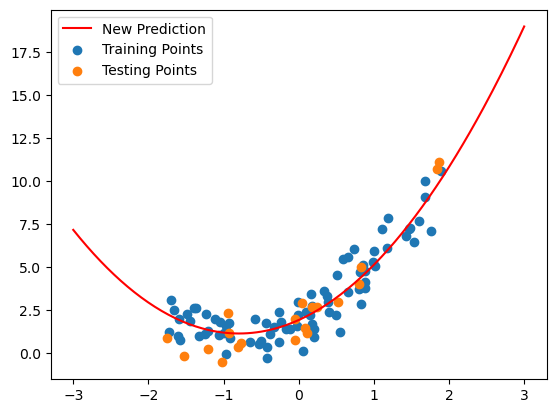

In [30]:
y_pred_new = regression.predict(X_new_poly)
plt.plot(X_new, y_pred_new, c="r", label="New Prediction")
plt.scatter(X_train, y_train, label="Training Points")
plt.scatter(X_test, y_test, label="Testing Points")
plt.legend()  # Shows Labeling